In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = np.expand_dims(x_train, axis=3).astype('float32')

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_test = np.expand_dims(x_test, axis=3).astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from keras.utils import to_categorical
%matplotlib inline

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

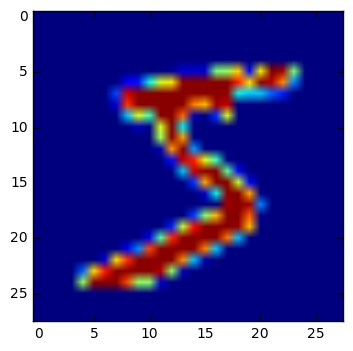

In [10]:
plt.imshow(np.reshape(x_train[0], (28,28)))

In [11]:
np.argmax(y_train[0])

5

In [12]:
import tensorflow as tf

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation=(tf.nn.softmax)))

TypeError: softmax() got an unexpected keyword argument 'axis'

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.15)